# Caminata aleatoria 

Es la sucesión de variables aleatorias que tiene probabilidad $p$ de irse hacia la derecha, $q$ de irse a la izquierda y $r$ de quedarse en el mismo lugar

<div style='text-align: center;'>
<img src='./img/caminara_aleatoria.png' width=''/>
</div>

Tenemos tres posibilidades a escoger. Cómo podríamos generar variables aleatorias que decidieran qué hacer en el siguiente paso si sabemos cada una de las probabilidades

Supongamos que tenemos $p,q,r\in [0,1]$ tal que $p+q+r=1$. Para simular estos resultados de manera que las proporciones de la simulación coincidan con los números podemos proceder como sigue:

1. Simulamos una variable aleatoria $X$ uniforme entre el 0 y el 1 (usando, por ejemplo `np.random.random()`)
2. Dividimos el intervalo unitario en bloques de longitud $p,q,r$ y miramos en qué bloque cayó $x$
3. Escogemos una de las siguientes opciones
    - Si cayó en el intervalo de $[0,p]$ (esto sucede con probabilidad $p$) nos movemos a la derecha
    - Si cayó en el intervalo de $[p,p+q]$ entonces nos movemos hacia la izquierda
        - Esto sucede con probabilidad $q$ porque la longitud del evento favorable en el intervalo unitario es $p-q -q=q$ y la longitud del intervalo unitario es 1, entonces tenemos $$\mathbb{P}[X\in [p,p+q]]= \frac{q}{1}=q $$
    - Si cayó en el intervalo de $[p+q,1]$ entonces nos quedamos en el mismo lugar
        - Siguiendo el argumento anterior esto tiene probabilidad $1-(p+q)=r$ 

Programemos esto

La variable aleatoria generada tiene un valor de: 0.7148312455780221
Resultado del experimento:
Muevete a la izquierda


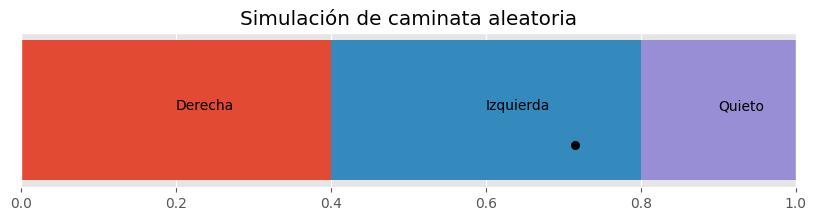

In [2]:
# Para generar una sucesión de variables aleatorias podemos hacer una lista de las mismas

import numpy as np # Importamos la librería

x=np.random.random() # Generamos variable aleatoria entre 0 y 1

# Definimos los parámetros
p,q,r=0.4,0.4,0.2  # Vemos que suman a 1


print(f'La variable aleatoria generada tiene un valor de: {x}')
print('Resultado del experimento:')
# Ahora vemos en qué intervalo cayó usando los siguientes condicionales
if x<p: # ¿porque esto da igual que decir x<=p?
    print('Muevete a la derecha')
elif (x>p) and (x<p+q):
    print('Muevete a la izquierda')
else:
    print('Quieto')

import matplotlib.pyplot as plt
plt.style.use('ggplot')


plt.figure(figsize=(10,2))
plt.fill_between(x=[0,p],y1=0,y2=1,label='Derecha')
plt.fill_between(x=[p,p+q],y1=0,y2=1,label='Izquierda')
plt.fill_between(x=[p+q,1],y1=0,y2=1,label='Quedarse')
plt.scatter(x,0.25,c='k',label='x')
plt.annotate(text='Derecha',xy=[p/2,0.5])
plt.annotate(text='Izquierda',xy=[p+q/2,0.5])
plt.annotate(text='Quieto',xy=[p+q+r/2,0.5])
plt.xlim(0.0,1)
# plt.legend()
plt.yticks([])
plt.title('Simulación de caminata aleatoria')
plt.show()

Ya teniendo esto podemos ponerlo en una función 

In [2]:
def generar_siguiente_CA(p,q,xi=0):
    x=np.random.random()
    if x<p: 
        return xi+1
    elif (x>p) and (x<p+q):
        return xi-1
    else:
        return xi   
    
generar_siguiente_CA(p,q,xi=100)

101

Como comprobación simulamos muchas VA de esta distribución y vemos que obtenemos

0 -1 [False  True False ... False False  True]
1 0 [ True False  True ...  True False False]
2 1 [False False False ... False  True False]


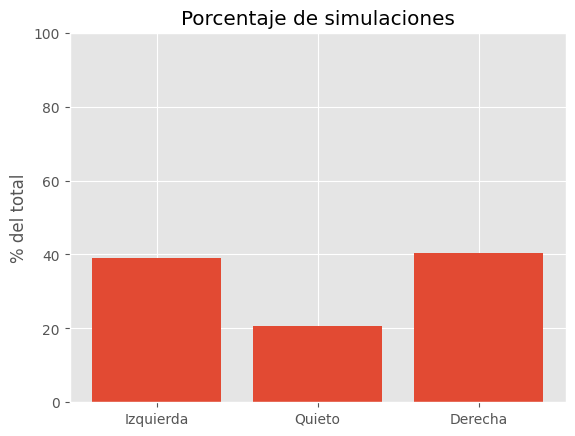

In [3]:
resultado_paso=np.zeros(10_000)

for i in range(10_000):
    resultado_paso[i]=generar_siguiente_CA(p,q)

valores_x=[-1,0,1]
cuentas_paso=np.zeros(3)

for i in range(3):
    print(i,valores_x[i],resultado_paso==valores_x[i])
    cuentas_paso[i]=(resultado_paso==valores_x[i]).sum()/10_000

plt.bar([-1,0,1],100*cuentas_paso)
plt.title('Porcentaje de simulaciones')
plt.xticks([-1,0,1],['Izquierda','Quieto','Derecha'])
plt.ylim(0,100)
plt.ylabel('% del total')
plt.show()

In [4]:
100*cuentas_paso

array([38.94, 20.61, 40.45])

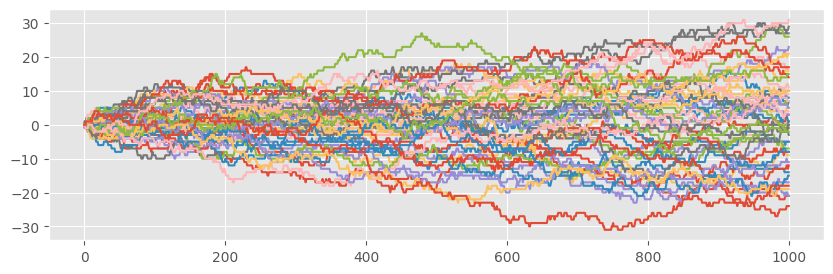

In [5]:
def generar_CA(p,q,Xi=0,size=1_000):

    caminata_aleatoria=[Xi]

    for _ in range(size-1): # Cuando la variable que se itera no se va a usar se le suele poner un _ 
        Xi_mas_uno=generar_siguiente_CA(p,q,xi=caminata_aleatoria[-1])
        caminata_aleatoria.append(Xi_mas_uno)
        
    return caminata_aleatoria

plt.figure(figsize=(10,3))

for i in range(50):
    plt.plot(generar_CA(p=0.1,q=0.1))

# plt.vline(x=600,ymin=-30,ymax=30)

En la tarea viene el siguiente resultado para la caminata simple $r=0$

$$Var(X_n)=4npq$$

In [6]:
var_arreglo=[]
p=0.4
q=1-p
for i in range(1_000):
    Xn=generar_CA(p=0.5,q=1-p)
    var_arreglo.append(Xn[-1])

np.var(var_arreglo), 4*p*q*1000


(999.616256, 960.0)

¿Qué pasa para diferentes valores de $p,q,r$?

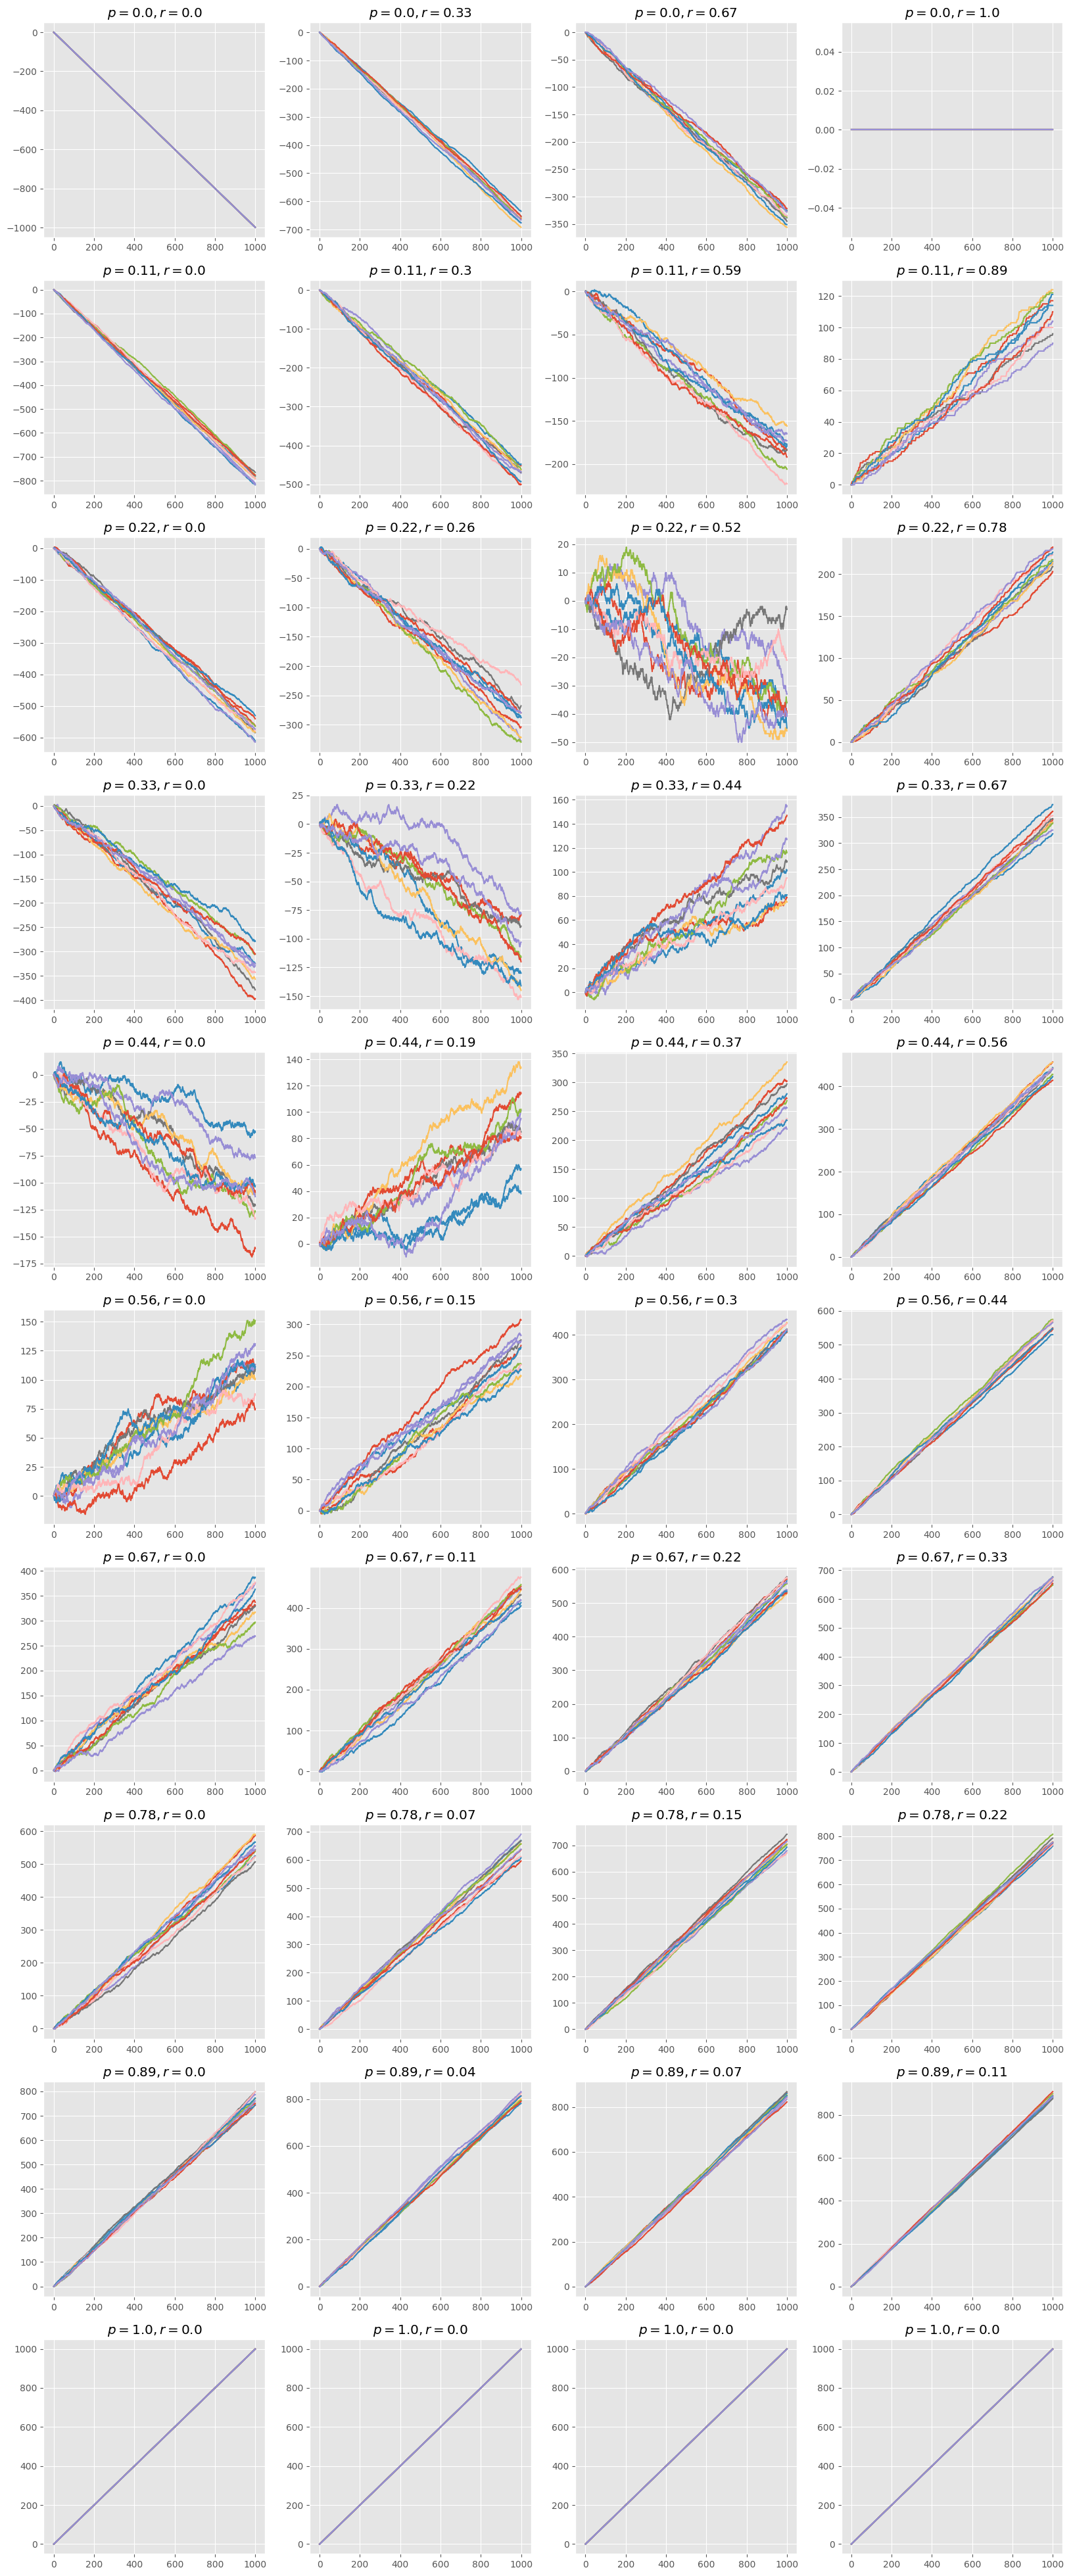

In [7]:
p_lista=np.linspace(0,1,10)
len_r_lista=4
fig, ax= plt.subplots(nrows=len(p_lista),ncols=len_r_lista,figsize=(len_r_lista*5,len(p_lista)*5))

for i,pi in enumerate(p_lista):
    r_lista=np.linspace(0,1-pi,len_r_lista)
    for j,rj in enumerate(r_lista):
        ax[i,j].set_title(f'$p={round(pi,2)}, r={round(rj,2)}$')
        for _ in range(10):
            # ax[i,j].set_ylim(-50,50)
            ax[i,j].plot(generar_CA(p=pi,q=1-pi-rj))


# Movimientos hacia la izquierda de la cadena

Cadenas más grandes de intervalos constantes antes de un cambio

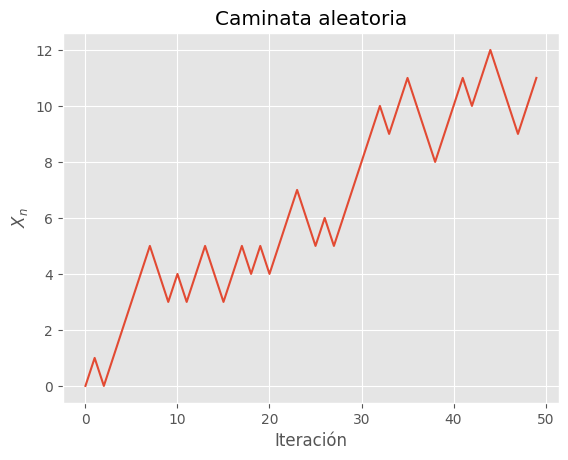

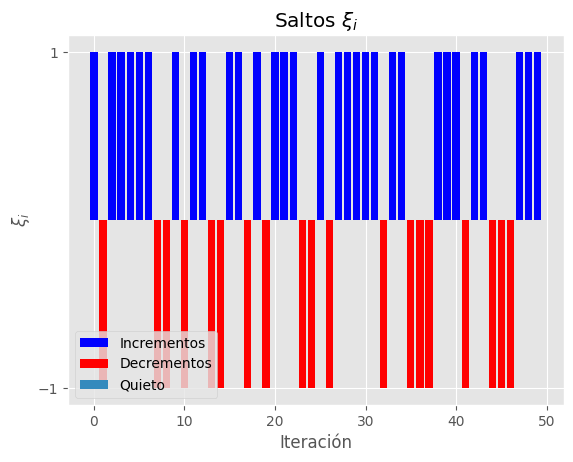

In [8]:
p=0.6

Xn=generar_CA(p,1-p) # Gener una caminata aleatoria con p=0.6, q=0.4, r=0
diff=[] # Lista para almacenar diferencias

# Rellenando la lista diff con las diferencias (\xis)
for i in range(1,len(Xn)):
    diff.append(Xn[i]-Xn[i-1])

plt.plot(Xn[:50]); plt.title('Caminata aleatoria')
plt.xlabel('Iteración');plt.ylabel('$X_n$');plt.show()

incrementos_idx=np.arange(0,50)[np.array(diff[:50])==1]
plt.bar(x=incrementos_idx,height=np.array(diff[:50])[incrementos_idx],color='b',label='Incrementos')

decrementos_idx=np.arange(0,50)[np.array(diff[:50])==-1]
plt.bar(x=decrementos_idx,height=np.array(diff[:50])[decrementos_idx],color='r',label='Decrementos')

quieto_idx=np.arange(0,50)[np.array(diff[:50])==0]
plt.bar(x=quieto_idx,height=np.array(diff[:50])[quieto_idx]+0.1,color='y',label='Quieto')
plt.title('Saltos $\\xi_i$'); plt.yticks([-1,1]); plt.xlabel('Iteración');plt.ylabel('$\\xi_i$'); plt.legend(); plt.show()

In [9]:
decrementos_idx

array([ 1,  7,  8, 10, 13, 14, 17, 19, 23, 24, 26, 32, 35, 36, 37, 41, 44,
       45, 46])

In [10]:
diff

[1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1

In [11]:
# Rachas más largas sin caidas 

idx_caidas=[]

for i,di in enumerate(diff):
    if di==-1:
        idx_caidas.append(i)

idx_caidas

[1,
 7,
 8,
 10,
 13,
 14,
 17,
 19,
 23,
 24,
 26,
 32,
 35,
 36,
 37,
 41,
 44,
 45,
 46,
 50,
 52,
 55,
 57,
 58,
 64,
 69,
 72,
 77,
 78,
 81,
 83,
 84,
 87,
 90,
 92,
 94,
 99,
 103,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 115,
 116,
 118,
 119,
 122,
 123,
 124,
 125,
 126,
 128,
 130,
 133,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 154,
 156,
 157,
 159,
 161,
 163,
 164,
 167,
 171,
 174,
 175,
 178,
 180,
 182,
 183,
 187,
 189,
 192,
 196,
 203,
 204,
 205,
 206,
 207,
 209,
 211,
 213,
 214,
 217,
 219,
 220,
 221,
 224,
 225,
 228,
 231,
 233,
 239,
 241,
 248,
 249,
 250,
 251,
 254,
 256,
 260,
 261,
 266,
 267,
 270,
 271,
 274,
 277,
 278,
 279,
 281,
 287,
 289,
 292,
 296,
 297,
 299,
 301,
 303,
 305,
 311,
 314,
 315,
 316,
 318,
 319,
 320,
 322,
 327,
 334,
 337,
 338,
 339,
 351,
 352,
 353,
 354,
 356,
 357,
 362,
 366,
 369,
 371,
 373,
 375,
 376,
 377,
 378,
 380,
 381,
 384,
 386,
 388,
 390,
 391,
 392,
 393,
 400,
 406,
 407,
 411,
 412,
 414,
 416,
 4

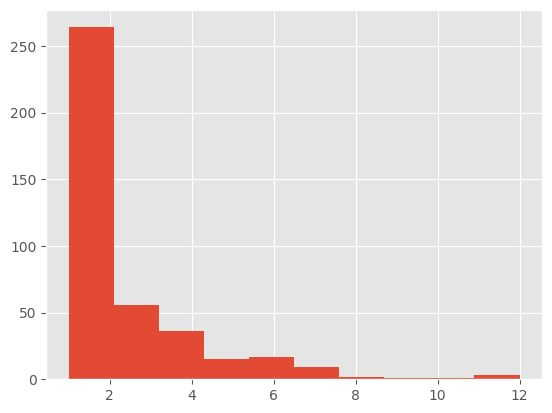

In [12]:
diff_idx_caidas=[idx_caidas[0]]
for i in range(1,len(idx_caidas)):
    diff_idx_caidas.append(idx_caidas[i]-idx_caidas[i-1])
plt.hist(diff_idx_caidas)
plt.show()

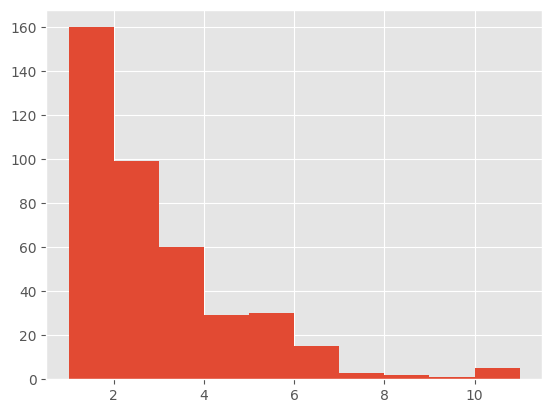

In [13]:
plt.hist(np.random.geometric(p=1-p,size=len(diff_idx_caidas)))
plt.show()

# Ley de los grandes números y Teorema Central del Límite

Si tenemos un conjunto de variables aleatorias i.i.d. (independientes e idénticamente distribuidas) $X_i$ tales que $$ \mathbb{E}\left[ X_i\right]=\mu, \text{Var}\left( X_i \right)=\sigma^2 $$
entonces el siguiente resultado para la media muestral

$$ 
\begin{align}
\bar{X}_n=\frac{1}{n}\sum_{i=1}^n X_i \Rightarrow \mu
\end{align}
$$

y además va variando cada vez más poco de acuerdo a 
$$ 
\begin{align}
\text{Var}\left( \bar{X}_n \right)&=\frac{1}{n^2}\cdot \sum_{i=1}^n \text{Var}\left( X_i \right)\\
&=\frac{1}{n^2}\cdot n \text{Var}\left( X_i \right)\\
&=\frac{\sigma^2}{n}
\end{align}
$$



Al tomar en cuenta la suma de las variables en vez del promedio tenemos que la varianza estará dada por 

$$ 
\begin{align}
\text{Var}\left(\sum X_i\right)&=\text{Var}\left( n \bar{X}_n \right)\\
&=n^2\text{Var}\left( \bar{X}_n \right)\\
&=n^2 \frac{\sigma^2}{n}\\
&=n\sigma^2
\end{align}
$$

por lo que la desviación estándar está dada por 

$$ \sigma_\Sigma=\sqrt{n} \sigma $$

Una caminata aleatoria se puede ver como 

$$X_n=X_0+\sum_{i=1}^n \xi_i$$

donde las $\xi_i$ son i.i.d Bernoulli con parámetro $p$, pero valen 1 en caso de éxito y -1 en caso contrario. 

Sabemos que las bernoulli tienen una varianza dada por $\sigma^2_{\text{Bernoulli}}=pq$, al tener el cambio de que ahora toman valores en -1 y 1 la varianza se vuelve  $\sigma^2_{\text{Bernoulli}}=4pq$ (como vieron en la tarea). 

Usando estos resultados vemos que la desviación estándar de la suma estará dada por 

$$\sigma_\Sigma=\sqrt{\text{Var}\left(X_n\right)}=\sqrt{4npq}$$


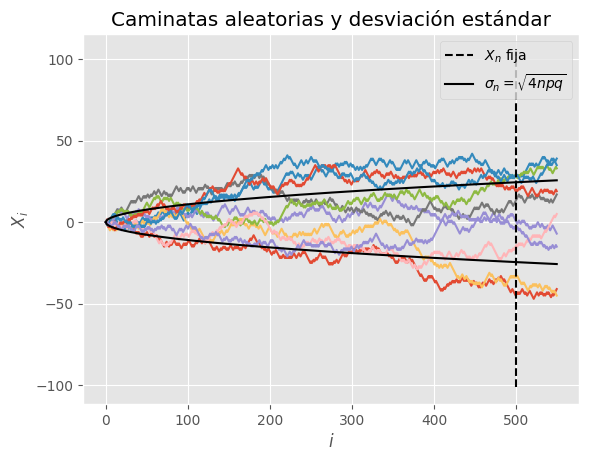

In [34]:
# Tarda aproximadamente 40 segundos en correr

long_cadena=550
n=np.arange(0,long_cadena)


N_cadenas=100_000
p=0.5

X_lista=[]
for i in range(N_cadenas):
    X=generar_CA(p=p,q=1-p,size=long_cadena)
    X_lista.append(X)
    if i%(N_cadenas//10)==0:
        plt.plot(X)

X_array=np.array(X_lista)


plt.vlines(x=500,ymin=X_array.min(),ymax=X_array.max(),linestyles='dashed',label='$X_n$ fija',colors='k')
plt.plot(n,np.sqrt(4*p*q*n),c='k',label='$\\sigma_n=\\sqrt{4 n pq}$')
plt.plot(n,-np.sqrt(4*p*q*n),c='k')
plt.title('Caminatas aleatorias y desviación estándar')
plt.xlabel('$i$')
plt.ylabel('$X_i$')
plt.legend()
plt.show()

¿Cómo vemos cuántas $X_n$ quedan a más allá de una desviación estándar de la media dado `X_array`?

La media para la caminata aleatoria simple está dada por 

$$\mathbb{E}[X_n|X_0=0]= n(p-q)$$

de modo que si tenemos una caminata balanceada obtenemos

$$\mathbb{E}[X_n|X_0=0]=0$$

entonces tendremos que ver todos los elementos que están entre $-\sigma_n,\sigma_n$.

El arreglo `X_array` es una matriz, podemos ver su tamaño con la siguiente instrucción

In [35]:
X_array.shape

(100000, 550)

Es decir, las filas tienen el índice de cada cadena individual y las columnas tienen el índice de la $n$ dentro de $X_n$. Entonces, para obtener el paso 0 de todas las cadenas, escribimos

In [36]:
X_array[:,0] # Devuelve los pasos cero de todas las cadenas

array([0, 0, 0, ..., 0, 0, 0])

A continuación graficamos los elementos de la cadena para $n=1000$ esto es análogo a fijarnos en todos los valores de la línea 

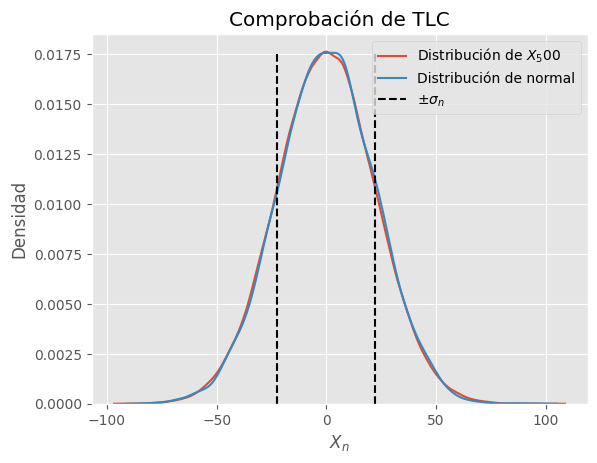

In [48]:
import seaborn as sns

X_500=X_array[:,500]

sigma_500=np.sqrt(4*p*(1-p)*500)

plt.title('Comprobación de TLC')
sns.kdeplot(X_500,label='Distribución de $X_500$')
plt.xlabel('$X_n$')
plt.ylabel('Densidad')
sns.kdeplot(np.random.normal(loc=0,scale=sigma_500,size=10_000),label='Distribución de normal')
plt.vlines(x=[sigma_500,-sigma_500],ymin=0,ymax=0.0175,linestyles='dashed',colors='k',label='$\\pm \\sigma_{n}$')
plt.legend()
plt.show()


La proporción de números que se quedan a una desviación estándar la podemos calcular contando los elementos que están a una desviación estándar y luego dividiendo entre el total

In [49]:
arreglo_booleano=np.abs(X_500)>=sigma_500 # indica cuál elemento es mayor a sigma_500
arreglo_booleano

array([ True,  True, False, ..., False, False, False])

In [50]:
print(f'Porcentaje de cadenas que en el paso 500 que caen afuera de sigma_500: {100*arreglo_booleano.sum()/len(arreglo_booleano)}%')

Porcentaje de cadenas que en el paso 500 que caen afuera de sigma_500: 30.424%


In [51]:
X_norm_500=np.random.normal(loc=0,scale=sigma_500,size=10_000)
arreglo_booleano=np.abs(X_norm_500)>sigma_500
print(f'Porcentaje de cadenas que en el paso 500 que caen afuera de sigma_500: {100*arreglo_booleano.sum()/len(arreglo_booleano)}%')

Porcentaje de cadenas que en el paso 500 que caen afuera de sigma_500: 32.92%


# Ejercicio 6 Estado cero

In [62]:
k_array=np.linspace(1,10_000,100)
t_paro_mean=[]

for k in k_array:
    t_paro_lista=[]
    for _ in range(10_000):
        Xn=[k]
        i=0
        while Xn[-1]!=0:
            i+=1
            Xn.append(np.floor(np.random.random()*Xn[-1]))

        t_paro_lista.append(i)
    t_paro_mean.append(np.mean(t_paro_lista))


Text(0, 0.5, 'Tiempo de paro')

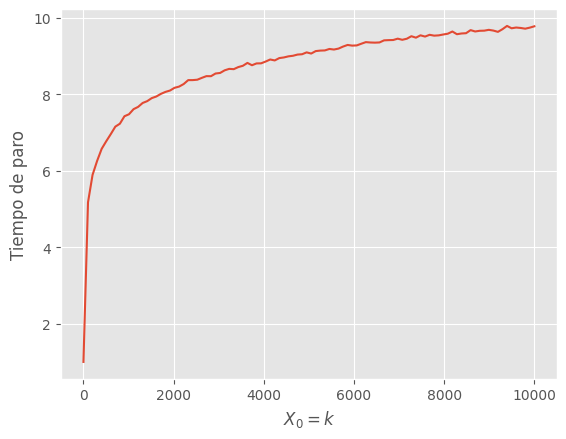

In [65]:
plt.plot(k_array,t_paro_mean)
plt.xlabel('$X_0=k$')
plt.ylabel('Tiempo de paro')